In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import scipy.cluster.hierarchy as shc 
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler, normalize

In [3]:
df = pd.read_csv(r'C:\Users\Mayank1\Downloads\574_proj_dataset_v3.0\Project_Data_1.csv',thousands  = ',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sales of Wheat in tons  207 non-null    object
 1   1990                    207 non-null    int64 
 2   1991                    207 non-null    int64 
 3   1992                    207 non-null    int64 
 4   1993                    207 non-null    int64 
 5   1994                    207 non-null    int64 
 6   1995                    207 non-null    int64 
 7   1996                    207 non-null    int64 
 8   1997                    207 non-null    int64 
 9   1998                    207 non-null    int64 
 10  1999                    207 non-null    int64 
 11  2000                    207 non-null    int64 
 12  2001                    207 non-null    int64 
 13  2002                    207 non-null    int64 
 14  2003                    207 non-null    int64 
 15  2004  

In [5]:
df.head()

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [6]:
df.isnull().sum()
## CHECKING FOR NULL VALUES

Sales of Wheat in tons    0
1990                      0
1991                      0
1992                      0
1993                      0
1994                      0
1995                      0
1996                      0
1997                      0
1998                      0
1999                      0
2000                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
dtype: int64

In [7]:
df=df.rename(columns={'Sales of Wheat in tons':'Country of sale'})

In [8]:
df

,Country of sale,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130
205,Zambia,436,456,494,526,556,585,602,626,634,657,658,680,517,478,468,453,422,387


In [9]:
df.dtypes
## DATATYPE CHECKING, ALL THE DATA IS IN INTEGER FORMAT

Country of sale    object
1990                int64
1991                int64
1992                int64
1993                int64
1994                int64
1995                int64
1996                int64
1997                int64
1998                int64
1999                int64
2000                int64
2001                int64
2002                int64
2003                int64
2004                int64
2005                int64
2006                int64
2007                int64
dtype: object

In [10]:
df['1990'].dtypes

dtype('int64')

In [11]:
df['1990'].describe()

count     207.000000
mean      196.966184
std       232.385067
min         0.000000
25%        42.000000
50%        96.000000
75%       290.000000
max      1485.000000
Name: 1990, dtype: float64

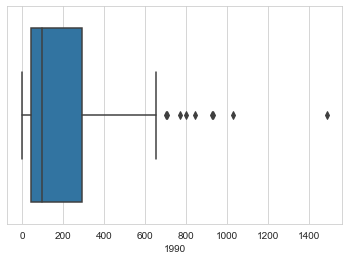

In [12]:
sn.set_style('whitegrid')
sn.boxplot(df['1990'])

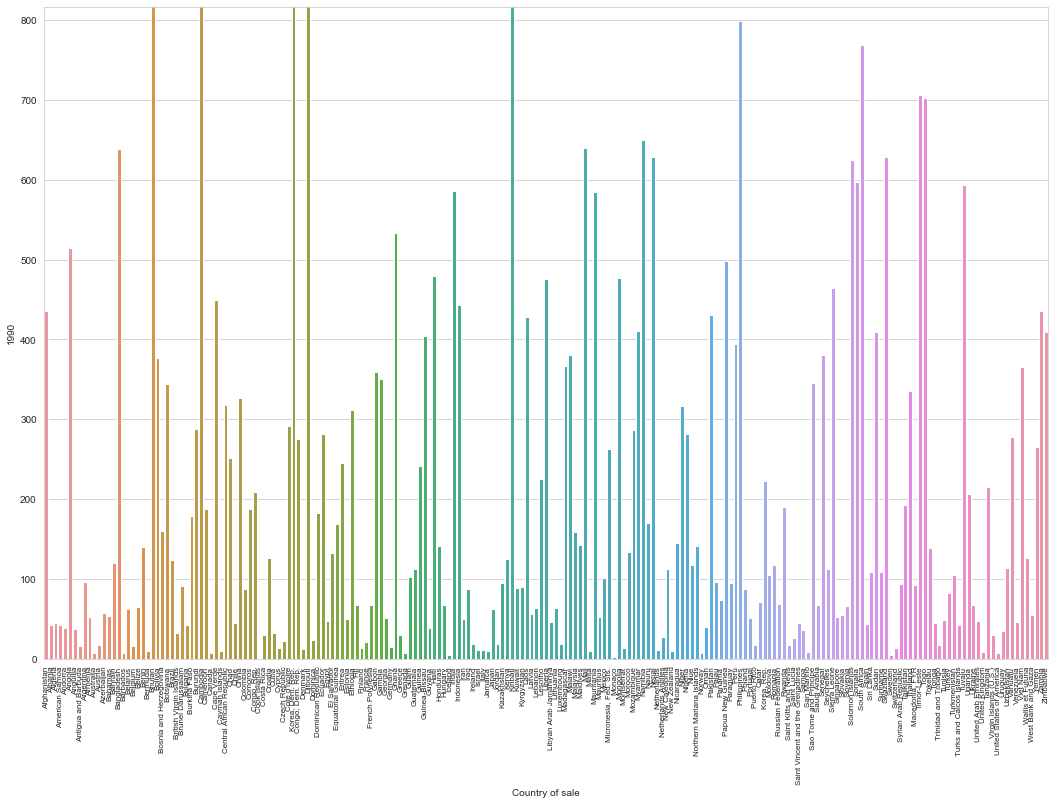

In [13]:
plt.figure(figsize=(18,12))
sn.set_style('whitegrid')
sn.barplot(df['Country of sale'],df['1990'])
plt.xticks(rotation=90,size=8)
plt.margins(x=0,y=-.45)
plt.show()

In [14]:
df.index.names = ['Country of sale']
df

,Country of sale,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country of sale,,,,,,,,,,,,,,,,,,,
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
203,West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
204,Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130


In [15]:
df =df.set_index('Country of sale')
## SETTING COUNTRY NAME AS INDEX

In [16]:
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country of sale,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130


In [17]:
sklearn_pca = PCA(n_components=1)
sklearn_pca.fit(df)

df_transformed = sklearn_pca.transform(df)

print(df_transformed.shape)


print(sklearn_pca.explained_variance_ratio_)

(207, 1)
[0.91808789]


In [18]:
sklearn_pca = PCA(n_components=2)
sklearn_pca.fit(df)

df_transformed = sklearn_pca.transform(df)

print(df_transformed.shape)


print(sklearn_pca.explained_variance_ratio_)
## 2 COMPONENTS GIVE 97.8 PERCENT VARIANCE CAPTURE

(207, 2)
[0.91808789 0.060556  ]


In [19]:
df_transformed_pca = pd.DataFrame(df_transformed)


In [20]:
df_transformed_pca.index = df.index

In [21]:
df_transformed_pca.columns = ['PC1','PC2']

In [22]:
df_transformed_pca

,PC1,PC2
Country of sale,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736
...,...,...
Wallis et Futuna,-231.395787,123.076993
West Bank and Gaza,-585.225414,14.463482
Yemen,59.256311,177.536948


In [23]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed_pca)
    Sum_of_squared_distances.append(km.inertia_)
## FINDING BEST VALUE OF K THROUGH ELBOW METHOD

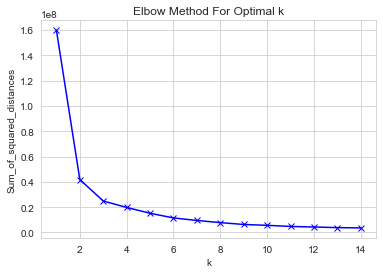

In [24]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
## PLOTTING ELBOW 

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_transformed_pca)
kmeans.cluster_centers_

array([[-515.89907824,   13.52152289],
       [ 818.40566987,  -80.66376278],
       [1988.84290863,  132.91583826]])

In [26]:
print(kmeans.labels_)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 1 0 1 0 0 0 0 1 1 2 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 2 1 0 2 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 2 0 2 0 0 0 0 1 0 0 1 1 2 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 2 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 2 0 0 0 1 1 2 0 0 1 0 2 0 0 0 0 1 0 2 2 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1]


In [27]:
unique,counts = np.unique(kmeans.labels_,return_counts = True)
print(dict(zip(unique,counts)))

{0: 141, 1: 50, 2: 16}


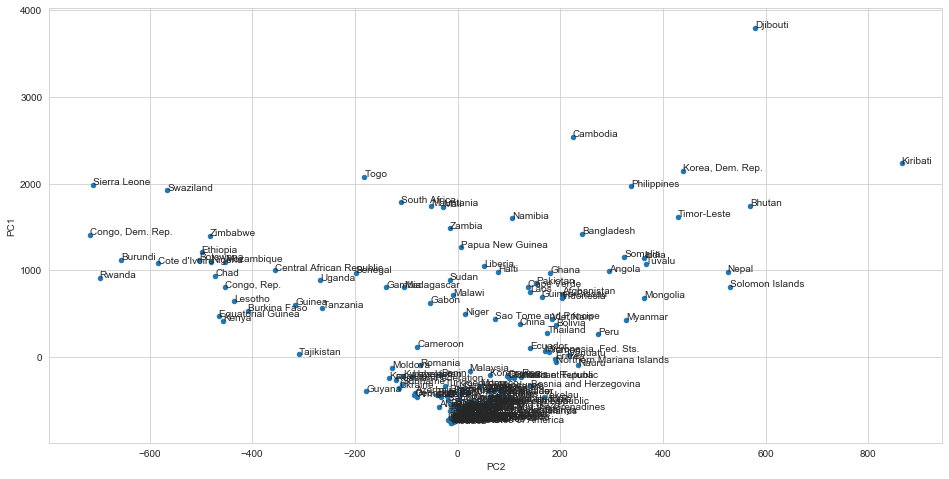

In [28]:
ax = df_transformed_pca.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(df_transformed_pca.index):
    ax.annotate(
        country, 
        (df_transformed_pca.iloc[i].PC2, df_transformed_pca.iloc[i].PC1)
    )

In [30]:
## WE ALSO HAVE TO FIND THE AVG. AND MAXIMUM SALE FIGURES AND PLOT THEM ACCORDINGLY
## SINCE WE HAVE REDUCED THE DIMENSIONS OF THE DATA, GOOD IDEA TO NORMALIZE THE MEAN FIGURE

from sklearn.preprocessing import normalize
    
df_transformed_pca['country_mean'] = pd.Series(df.mean(axis=1),index=df_transformed_pca.index)
country_mean_max = df_transformed_pca['country_mean'].max()
country_mean_min = df_transformed_pca['country_mean'].min()
country_mean_scaled = (df_transformed_pca.country_mean-country_mean_min) / country_mean_max
df_transformed_pca['country_mean_scaled'] = pd.Series(country_mean_scaled,index=df_transformed_pca.index) 
df_transformed_pca.head()

,PC1,PC2,country_mean,country_mean_scaled
Country of sale,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731
Albania,-613.296510,4.715978,36.944444,0.032420
Algeria,-569.303713,-36.837051,47.388889,0.042234
American Samoa,-717.082766,5.464696,12.277778,0.009240
Andorra,-661.802241,11.037736,25.277778,0.021457


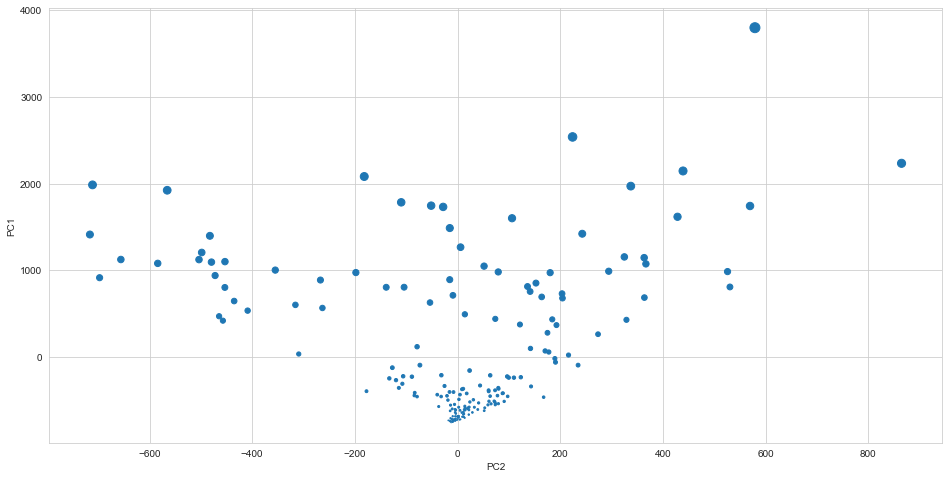

In [31]:
df_transformed_pca.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=df_transformed_pca['country_mean_scaled']*100, 
    figsize=(16,8))

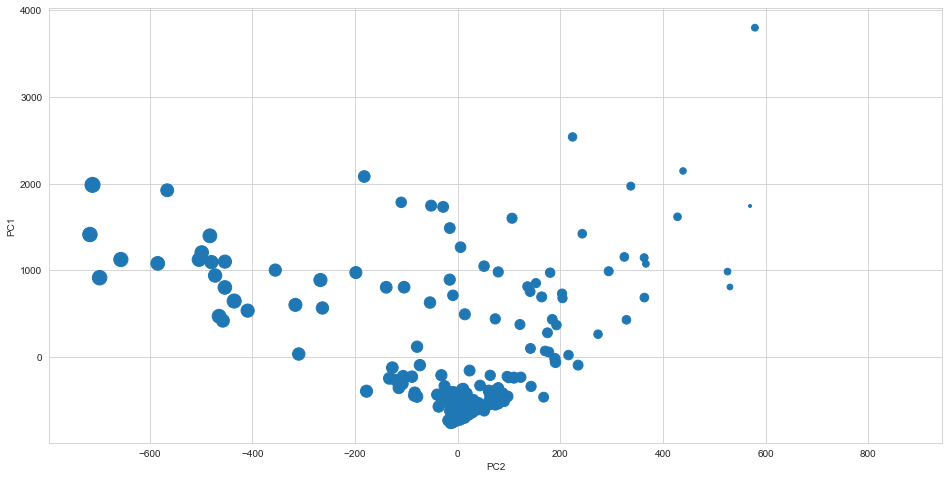

In [32]:
df_transformed_pca['country_change'] = pd.Series(
   df['2007']-df['1990'], 
    index=df_transformed_pca.index)
country_change_max = df_transformed_pca['country_change'].max()
country_change_min = df_transformed_pca['country_change'].min()
country_change_scaled = (df_transformed_pca.country_change - country_change_min) / country_change_max
df_transformed_pca['country_change_scaled'] = pd.Series(
        country_change_scaled, 
        index=df_transformed_pca.index)
df_transformed_pca[['country_change','country_change_scaled']].head()

df_transformed_pca.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=df_transformed_pca['country_change_scaled']*100, 
    figsize=(16,8))

In [33]:
df_transformed_pca['cluster']=pd.Series(kmeans.labels_, index=df_transformed_pca.index)
## ADDING THE CLUSTER INFORMATION TO THE PC DATAFRAME

In [34]:
df_transformed_pca.head()

,PC1,PC2,country_mean,country_mean_scaled,country_change,country_change_scaled,cluster
Country of sale,,,,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731,-198,0.850840,1
Albania,-613.296510,4.715978,36.944444,0.032420,-20,1.224790,0
Algeria,-569.303713,-36.837051,47.388889,0.042234,11,1.289916,0
American Samoa,-717.082766,5.464696,12.277778,0.009240,-37,1.189076,0
Andorra,-661.802241,11.037736,25.277778,0.021457,-20,1.224790,0


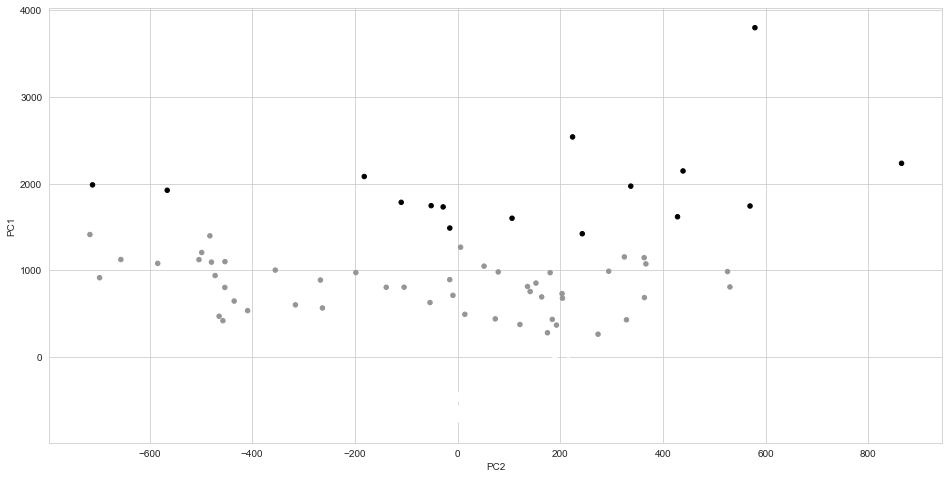

In [35]:
## PLOTTING TO SEE THE CLUSTERS FROM THE PC DATAFRAME
df_transformed_pca.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=df_transformed_pca.cluster.astype(np.float), 
        figsize=(16,8))

## WE SEE THE DATAPOINTS ARE WELL COVERED HERE

In [36]:
df['cluster'] = pd.Series(kmeans.labels_, index=df.index)

In [37]:
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
Country of sale,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,1
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,0
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,0
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,0
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25,0
West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31,0
Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130,0


In [38]:
df[df['cluster']==1]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
Country of sale,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,1
Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294,1
Bolivia,377,362,347,333,320,306,271,264,254,248,238,229,223,218,211,205,202,198,1
Botswana,344,355,351,349,347,349,336,349,371,413,445,497,535,586,598,599,621,622,1
Burkina Faso,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,1
Burundi,288,302,292,293,305,322,339,346,424,412,455,522,581,619,639,654,657,647,1
Cape Verde,449,438,428,418,408,398,394,391,387,384,380,283,374,370,367,278,285,280,1
Central African Republic,318,336,342,350,356,365,270,395,419,449,485,495,468,566,574,507,437,425,1
Chad,251,272,282,294,304,315,354,408,433,390,420,450,502,573,548,518,505,497,1


In [39]:
df[df['cluster']==2]
## MOST OF THESE COUNTRIES SHOW CONSISTENTLY GOOD FIGURES
## FEW OF THEM LIKE CONGO,KENYA AND ZIMBABWE HAVE SHOWN INCREASE IN THE NUMBERS OVER THE YEARS

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
Country of sale,,,,,,,,,,,,,,,,,,,
Bangladesh,639,623,608,594,579,576,550,535,516,492,500,491,478,458,444,416,392,387,2
Bhutan,924,862,804,750,699,651,620,597,551,538,515,512,472,460,443,412,406,363,2
Cambodia,928,905,881,858,836,811,810,789,777,764,758,750,728,712,696,676,672,664,2
"Korea, Dem. Rep.",841,828,815,802,788,775,775,775,775,770,713,650,577,527,499,508,500,441,2
Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,701,761,775,932,960,1034,1046,1093,1104,2
Kiribati,1026,1006,986,966,947,928,910,853,571,556,546,607,587,477,439,419,405,423,2
Mali,640,631,621,609,597,583,573,566,565,567,571,573,572,578,584,589,593,599,2
Mauritania,585,587,590,592,594,595,622,615,612,615,619,624,632,642,494,565,556,559,2
Namibia,650,685,687,683,671,658,387,395,411,442,481,506,544,560,572,570,556,532,2


In [40]:
## AGGLOMORATIVE CLUSTERING

In [41]:
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df) 

In [42]:
df_normalized = normalize(df_scaled) 
  
df_normalized = pd.DataFrame(df_normalized) 
## SCALING DATA HERE BEFORE APPLYING AG. CLUSTERING YIELDS BETTER RESULTS

In [43]:
pca = PCA(n_components = 2) 
df_principal = pca.fit_transform(df_normalized) 
df_principal = pd.DataFrame(df_principal) 
df_principal.columns = ['P1', 'P2'] 

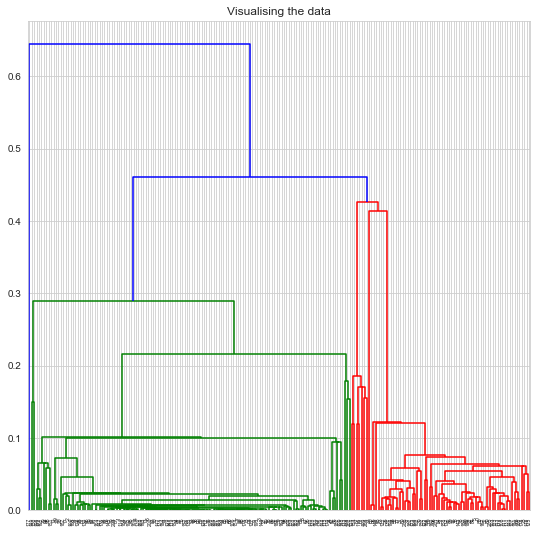

In [44]:
plt.figure(figsize =(9, 9)) 
plt.title('Visualising the data') 
plt.xticks( rotation = 90)
Dendrogram = shc.dendrogram((shc.linkage(df_principal, method ='single'))) 

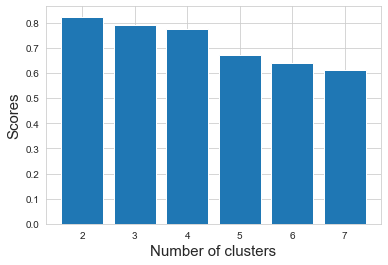

In [45]:
## LOOKING AT SCORES FOR DIFFERENT NUMBER OF CLUSTERS

k = [2, 3, 4, 5, 6,7] 
ac2 = AgglomerativeClustering(n_clusters = 2)  
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)
ac7 = AgglomerativeClustering(n_clusters = 7)
## silhouette scores of the different models added to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(df_principal, ac2.fit_predict(df_principal)))
silhouette_scores.append( 
        silhouette_score(df_principal, ac3.fit_predict(df_principal))) 
silhouette_scores.append( 
        silhouette_score(df_principal, ac4.fit_predict(df_principal))) 
silhouette_scores.append( 
        silhouette_score(df_principal, ac5.fit_predict(df_principal))) 
silhouette_scores.append( 
        silhouette_score(df_principal, ac6.fit_predict(df_principal))) 
silhouette_scores.append( 
        silhouette_score(df_principal, ac7.fit_predict(df_principal))) 
  
# Plotting a bar graph for comparison 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 15) 
plt.ylabel('Scores', fontsize = 15) 
plt.show() 
## ALTHOUGH 2 CLUSTERS SHOWS BEST SCORE, WE STILL GO WITH 3 AS IT SHOWS BETTER RESULTS 

In [46]:
clustering_labels_ = AgglomerativeClustering(n_clusters=3,linkage='ward').fit_predict(df_transformed_pca)
clustering_labels_

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 2, 0], dtype=int64)

In [47]:
df_transformed_pca['cluster']=pd.Series(clustering_labels_, index=df_transformed_pca.index)

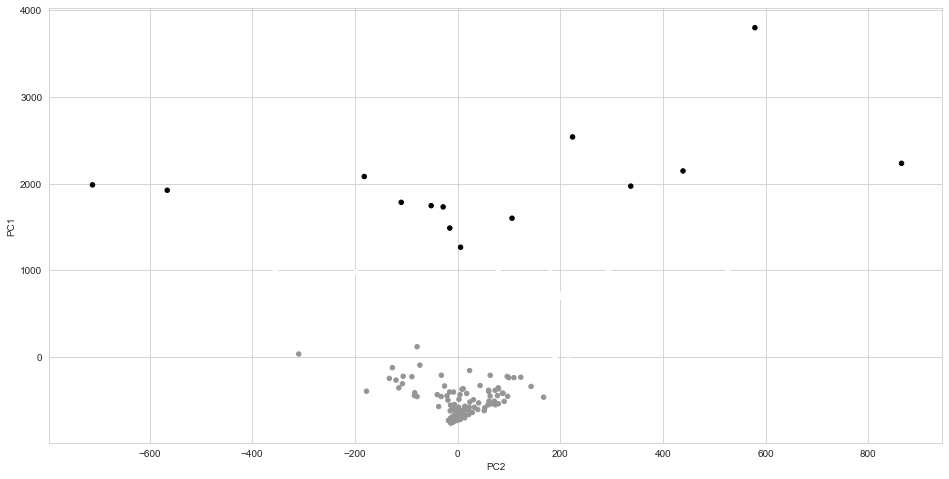

In [48]:
df_transformed_pca.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=df_transformed_pca.cluster.astype(np.float), 
        figsize=(16,8))

## K MEANS CLUSTERING COVERS THE DATAPOINTS BETTER 

In [49]:
df_transformed_pca.head()

,PC1,PC2,country_mean,country_mean_scaled,country_change,country_change_scaled,cluster
Country of sale,,,,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731,-198,0.850840,0
Albania,-613.296510,4.715978,36.944444,0.032420,-20,1.224790,1
Algeria,-569.303713,-36.837051,47.388889,0.042234,11,1.289916,1
American Samoa,-717.082766,5.464696,12.277778,0.009240,-37,1.189076,1
Andorra,-661.802241,11.037736,25.277778,0.021457,-20,1.224790,1


In [50]:
df['cluster'] = pd.Series(clustering_labels_, index=df.index)

In [51]:
df[df['cluster']==1]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
Country of sale,,,,,,,,,,,,,,,,,,,
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,1
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,1
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,1
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,1
Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,35,34,33,32,31,30,28,27,28,28,27,25,27,25,23,24,25,23,1
Uzbekistan,114,105,102,118,116,119,111,122,129,134,139,148,144,152,149,144,134,140,1
Venezuela,46,45,44,43,42,42,41,41,40,39,39,41,41,39,38,38,38,39,1


In [52]:
df[df['cluster']==2]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
Country of sale,,,,,,,,,,,,,,,,,,,
Cambodia,928,905,881,858,836,811,810,789,777,764,758,750,728,712,696,676,672,664,2
"Korea, Dem. Rep.",841,828,815,802,788,775,775,775,775,770,713,650,577,527,499,508,500,441,2
Djibouti,1485,1477,1463,1442,1414,1381,720,669,698,701,761,775,932,960,1034,1046,1093,1104,2
Kiribati,1026,1006,986,966,947,928,910,853,571,556,546,607,587,477,439,419,405,423,2
Mali,640,631,621,609,597,583,573,566,565,567,571,573,572,578,584,589,593,599,2
Mauritania,585,587,590,592,594,595,622,615,612,615,619,624,632,642,494,565,556,559,2
Namibia,650,685,687,683,671,658,387,395,411,442,481,506,544,560,572,570,556,532,2
Papua New Guinea,498,498,497,497,496,496,494,493,491,489,486,482,477,471,463,453,441,430,2
Philippines,799,783,766,750,735,719,705,689,669,649,600,578,561,542,534,520,505,500,2


In [53]:
df[df['cluster']==0]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
Country of sale,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,0
Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294,0
Bangladesh,639,623,608,594,579,576,550,535,516,492,500,491,478,458,444,416,392,387,0
Bhutan,924,862,804,750,699,651,620,597,551,538,515,512,472,460,443,412,406,363,0
Bolivia,377,362,347,333,320,306,271,264,254,248,238,229,223,218,211,205,202,198,0
Botswana,344,355,351,349,347,349,336,349,371,413,445,497,535,586,598,599,621,622,0
Burkina Faso,179,196,208,221,233,246,251,271,286,308,338,368,398,419,426,421,411,403,0
Burundi,288,302,292,293,305,322,339,346,424,412,455,522,581,619,639,654,657,647,0
Cape Verde,449,438,428,418,408,398,394,391,387,384,380,283,374,370,367,278,285,280,0
